In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

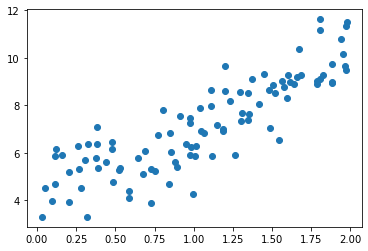

In [3]:
plt.scatter(X,y)

## The Normal Equation

In [4]:
X_b=np.c_[np.ones((100, 1)),X]
X_b

array([[1.        , 0.30752299],
       [1.        , 1.78966089],
       [1.        , 1.82462978],
       [1.        , 0.52938958],
       [1.        , 0.05176389],
       [1.        , 1.23073801],
       [1.        , 1.6606143 ],
       [1.        , 0.38885214],
       [1.        , 0.7265791 ],
       [1.        , 1.88470689],
       [1.        , 1.80799004],
       [1.        , 0.48100641],
       [1.        , 0.26245467],
       [1.        , 0.28213371],
       [1.        , 1.78617599],
       [1.        , 1.80558457],
       [1.        , 1.48518136],
       [1.        , 1.34938763],
       [1.        , 0.97535065],
       [1.        , 1.96385699],
       [1.        , 0.12113263],
       [1.        , 1.88536251],
       [1.        , 1.56478148],
       [1.        , 0.85298628],
       [1.        , 0.97754346],
       [1.        , 1.59255806],
       [1.        , 1.18572457],
       [1.        , 0.58981519],
       [1.        , 1.6414674 ],
       [1.        , 1.54322902],
       [1.

In [5]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0369378 ],
       [2.98198335]])

y = 3 + 3x + Gaussian noise

In [6]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.0369378 ],
       [10.00090451]])

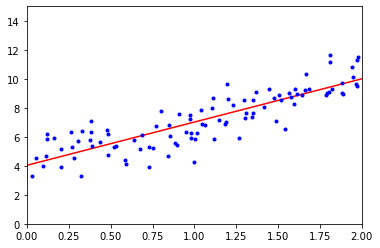

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

## Using SciKit Learn

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.0369378]), array([[2.98198335]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.0369378 ],
       [10.00090451]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.0369378 ],
       [2.98198335]])

### Psuedo Inverse (Moore-Penrose inverse)

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.0369378 ],
       [2.98198335]])

## Batch Gradient Descent

In [13]:
eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.0369378 ],
       [2.98198335]])

## Stochastic Gradient Descent

In [15]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.06112782],
       [3.0083558 ]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91955945]), array([2.95763375]))

## Polynomial Regression

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

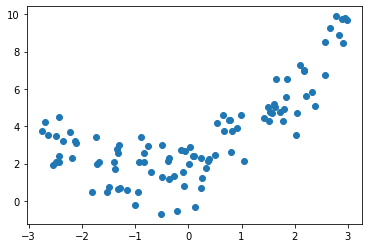

In [20]:
plt.scatter(X,y)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.14722237])

In [22]:
X_poly[0]

array([-0.14722237,  0.02167443])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96016914]), array([[0.90116881, 0.54471522]]))

## Learning Curves

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


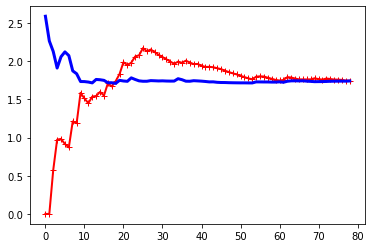

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

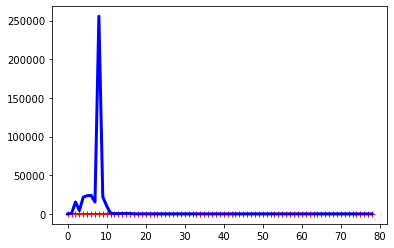

In [26]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

# Logistic Regression

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
import numpy as np
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


<ipython-input-4-87711258815a>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0


LogisticRegression()

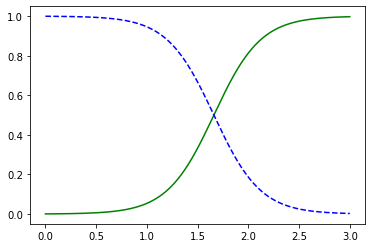

In [8]:
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [9]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

In [10]:
## Softmax Regression

In [11]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",
C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, multi_class='multinomial')

In [12]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])